<a href="https://colab.research.google.com/github/BelemoualemChaimae/Diagnostic-of-diabete-/blob/main/Diabetes_Clustering_without_insulin_skinthikness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function  
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import precision_score,f1_score, precision_score,recall_score
# import random undersampling and other necessary libraries 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

%matplotlib inline

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def clean_data(df_raw,cols_with_zeros=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],response = ['Outcome']):
    df = df_raw.copy()
    # replace zero with NaN in features
    df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
    # change response data type to int
    df[response] = df[response].astype('int')
    return df
 
diabetes_df = clean_data(diabetes_df)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
#Exploring the missing value
print("Proportion of missing values")
missing_values_count = diabetes_df.isna().sum()*100/diabetes_df.shape[0]
features_with_missing_values = missing_values_count[missing_values_count > 0].index.values
missing_values_count

Proportion of missing values


Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
diabetes_df.drop('SkinThickness',inplace=True, axis=1)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,168.0,43.1,2.288,33,1


In [ ]:
diabetes_df.drop('Insulin',inplace=True, axis=1)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [ ]:
diabetes_df.shape

(768, 7)

In [ ]:
diabetes_df.dropna(inplace=True)

In [ ]:
#Exploring the missing value
print("Proportion of missing values")
missing_values_count = diabetes_df.isna().sum()*100/diabetes_df.shape[0]
features_with_missing_values = missing_values_count[missing_values_count > 0].index.values
missing_values_count

Proportion of missing values


Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

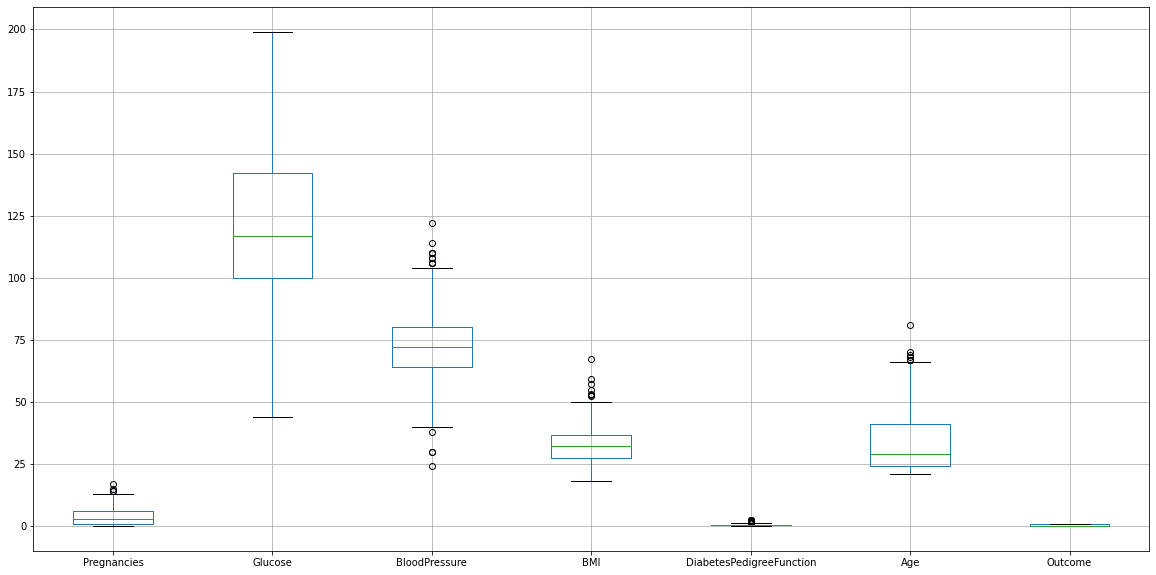

In [ ]:
# Creating plot
diabetes_df.boxplot(figsize=(20,10))
  
# show plot

plt.show()

In [ ]:
diabetes_df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,
0,475,475,475,475,475,475
1,249,249,249,249,249,249


In [ ]:
#Split the data
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11111)

In [ ]:
#Normalisation des données 
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train_norm)
    Sum_of_squared_distances.append(km.inertia_)

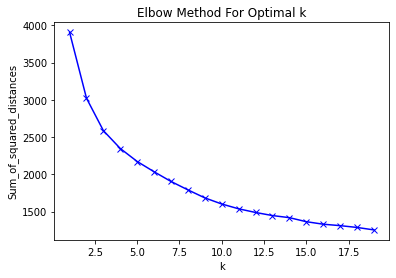

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
K_meanse=KMeans(n_clusters=5)
K_meanse = K_meanse.fit(X_train_norm)
y_labels_train = K_meanse.labels_
y_labels_test = K_meanse.predict(X_test_norm)

In [ ]:
print(K_meanse.labels_)

[3 4 0 4 3 3 1 3 2 0 2 3 4 2 3 1 2 3 3 4 4 4 4 2 1 4 3 3 3 3 4 4 3 0 0 0 3
 0 2 3 0 2 2 2 4 2 3 2 4 0 3 1 4 2 2 3 2 3 0 1 2 2 0 3 3 3 3 3 2 4 2 3 4 4
 3 2 1 1 4 4 3 3 0 2 4 3 1 2 3 2 2 0 3 3 1 2 2 3 2 1 3 3 3 2 3 1 3 2 2 4 3
 1 3 0 2 4 0 3 3 1 3 2 3 2 3 3 3 3 2 0 2 3 1 3 3 0 3 0 1 4 1 1 4 3 3 2 2 1
 4 3 2 0 0 1 4 3 3 3 3 2 2 3 3 3 0 3 4 0 2 2 0 2 3 3 2 3 3 4 0 2 1 2 3 1 0
 1 1 2 3 1 3 2 3 0 3 2 4 2 3 2 2 0 4 4 3 4 1 4 1 2 4 0 3 4 2 4 4 2 3 3 3 4
 4 2 2 2 2 2 2 1 1 2 1 0 3 0 0 3 3 4 3 4 4 3 0 3 3 4 4 3 0 0 2 4 3 0 3 3 2
 0 2 1 2 4 3 2 0 0 4 2 2 1 0 3 2 2 4 4 0 0 3 2 4 2 3 3 2 0 4 4 3 0 0 2 0 3
 3 0 3 3 3 2 3 2 0 3 4 3 4 4 4 3 2 1 4 3 3 0 0 3 3 2 3 3 0 1 3 0 1 2 0 4 0
 2 3 2 3 3 2 3 2 0 0 0 2 4 0 2 2 4 4 3 3 0 3 2 0 0 4 0 2 2 4 3 4 0 3 2 4 2
 1 3 3 3 4 4 2 4 4 1 3 2 3 3 0 4 0 2 0 0 0 4 2 4 2 3 4 2 4 3 3 3 3 0 3 2 0
 2 4 0 2 3 3 3 0 1 4 4 3 0 3 3 4 3 2 2 4 3 2 3 0 3 3 2 0 2 1 4 3 3 2 3 3 0
 3 1 4 3 3 3 2 3 4 3 2 2 3 2 0 0 3 4 3 3 1 2 2 3 2 2 3 0 3 3 0 4 3 0 2 2 2
 3 3 3 4 2 0 0 3 4 4 4 2 

In [ ]:
from sklearn.decomposition import PCA
pca_diabetes = PCA(n_components=2)
principalComponents_diabetes = pca_diabetes.fit_transform(X_train_norm)

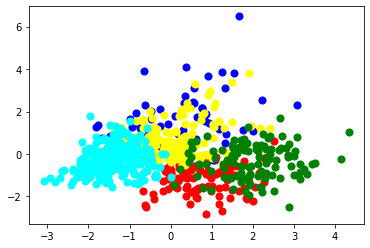

In [ ]:
#Ploting the clusters 
plt.scatter(principalComponents_diabetes[K_meanse.labels_==0,0],principalComponents_diabetes[K_meanse.labels_==0,1],s=50,color='red')
plt.scatter(principalComponents_diabetes[K_meanse.labels_==1,0],principalComponents_diabetes[K_meanse.labels_==1,1],s=50,color='blue')
plt.scatter(principalComponents_diabetes[K_meanse.labels_==2,0],principalComponents_diabetes[K_meanse.labels_==2,1],s=50,color='yellow')
plt.scatter(principalComponents_diabetes[K_meanse.labels_==3,0],principalComponents_diabetes[K_meanse.labels_==3,1],s=50,color='cyan')
plt.scatter(principalComponents_diabetes[K_meanse.labels_==4,0],principalComponents_diabetes[K_meanse.labels_==4,1],s=50,color='green')


In [ ]:
diabetesCheck_logistic = LogisticRegression()
diabetesCheck_logistic.fit(X_train_norm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy = diabetesCheck_logistic.score(X_test_norm, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  80.82191780821918 %


Text(0.5, 0, 'Importance')

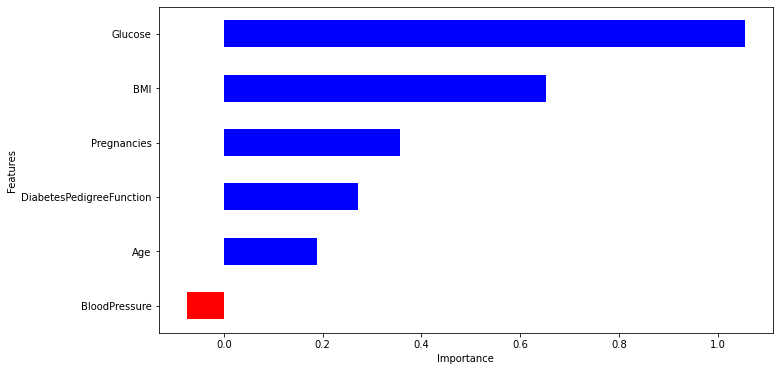

In [ ]:
coeff = list(diabetesCheck_logistic.coef_[0])
labels = list(diabetes_df.columns[:-1])
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')